# Solución Ejercicio Algoritmo K Nearest Neighbors


## 1. Importanción de librerías y datos

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### *Ejercicio 1: Importación del dataset*

Carga en un dataframe el reviews_sentiment.csv y muestra las primeras 10 filas. ¿De qué trata este dataset? Utiliza funciones de EDA para entender su contenido y sus opciones.

,love,kiss,inspector,murderer,class
0,10,5,2,0,1
1,8,6,0,1,1
2,7,4,0,0,1
3,0,1,12,20,2
4,1,0,8,56,2
5,5,6,2,0,1
6,1,0,12,4,2


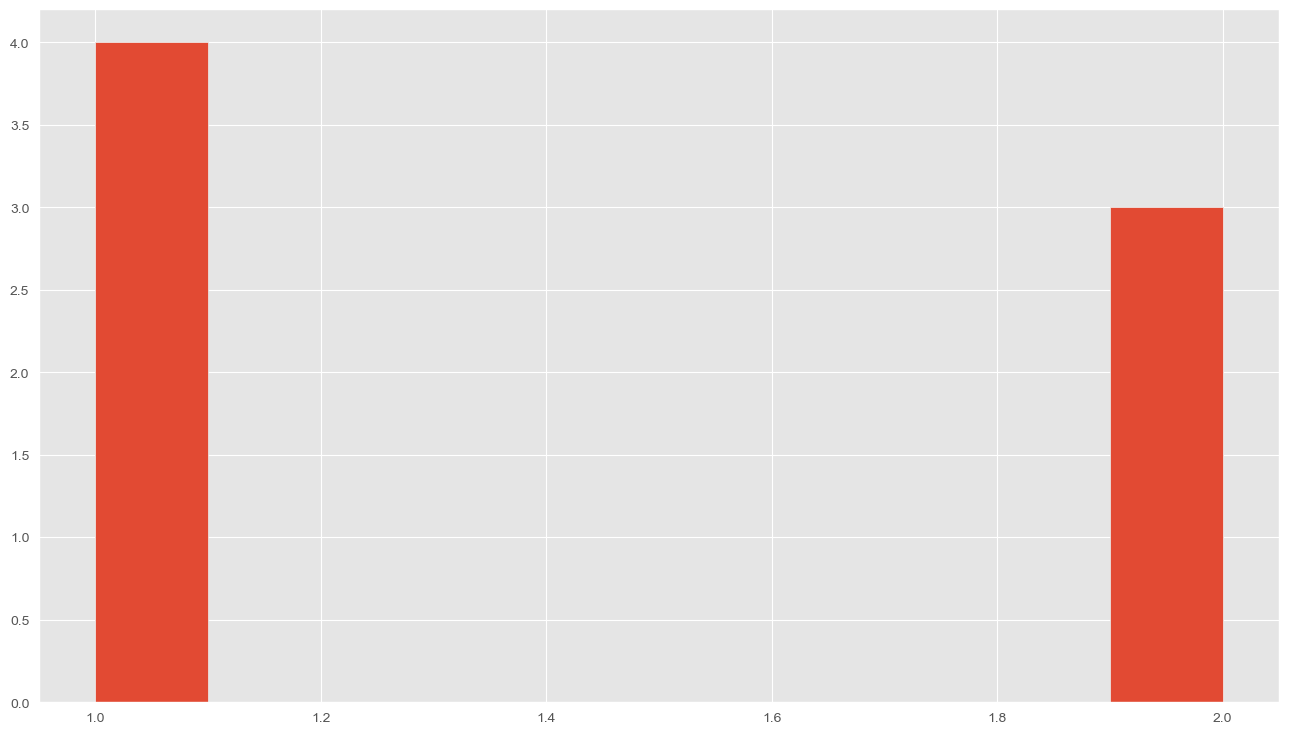

In [16]:
df = pd.DataFrame([[10,5,2,0,1],
                   [8,6,0,1,1],
                   [7,4,0,0,1],
                   [0,1,12,20,2],
                   [1,0,8,56,2],
                  [5,6,2,0,1],
                  [1,0,12,4,2]],
                  columns=['love','kiss','inspector','murderer','class'])
df.shape
df.describe()
df['class'].hist()
df

## 2. Preparación de los datos

In [17]:
X = df[['love','inspector']].values
y = df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
X_train

array([[ 8,  0],
       [ 0, 12],
       [10,  2],
       [ 5,  2],
       [ 1,  8]], dtype=int64)

## 3. Creación del modelo, entrenamiento y evaluación

In [18]:
n_neighbors = 3

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
      .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
      .format(knn.score(X_test, y_test)))

X_test

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00


array([[ 1, 12],
       [ 7,  0]], dtype=int64)

## 4. Predicción o inferencia

In [19]:
pred = knn.predict(X_test)
pred

array([2, 1], dtype=int64)

## 5. Métricas y matriz de confusión

In [20]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1 0]
 [0 1]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



## 6. Representación gráficá de los resultados

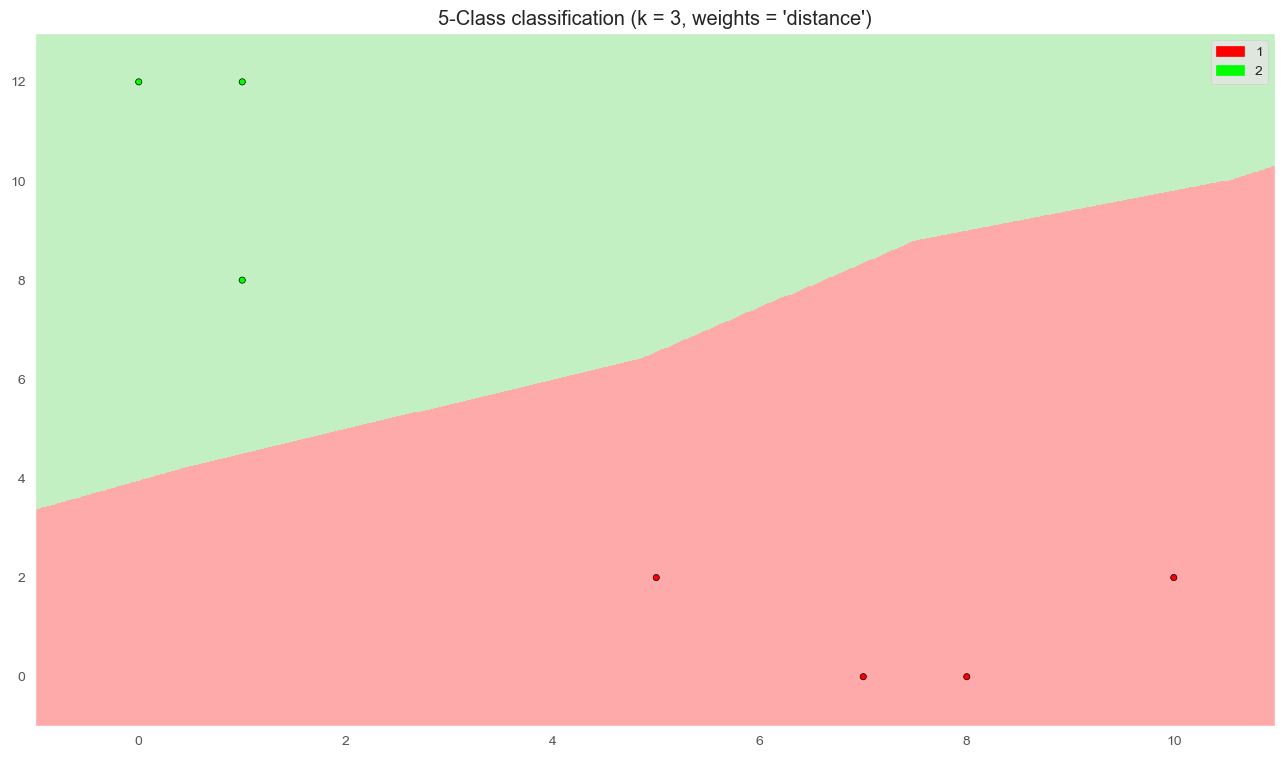

In [21]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

patch0 = mpatches.Patch(color='#FF0000', label='1')
patch4 = mpatches.Patch(color='#00FF00', label='2')
plt.legend(handles=[patch0, patch4])


plt.title("5-Class classification (k = %i, weights = '%s')"
          % (n_neighbors, 'distance'))

plt.show()


## 7. Cálculo del mejor K

([<matplotlib.axis.XTick at 0x1a4817d3220>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

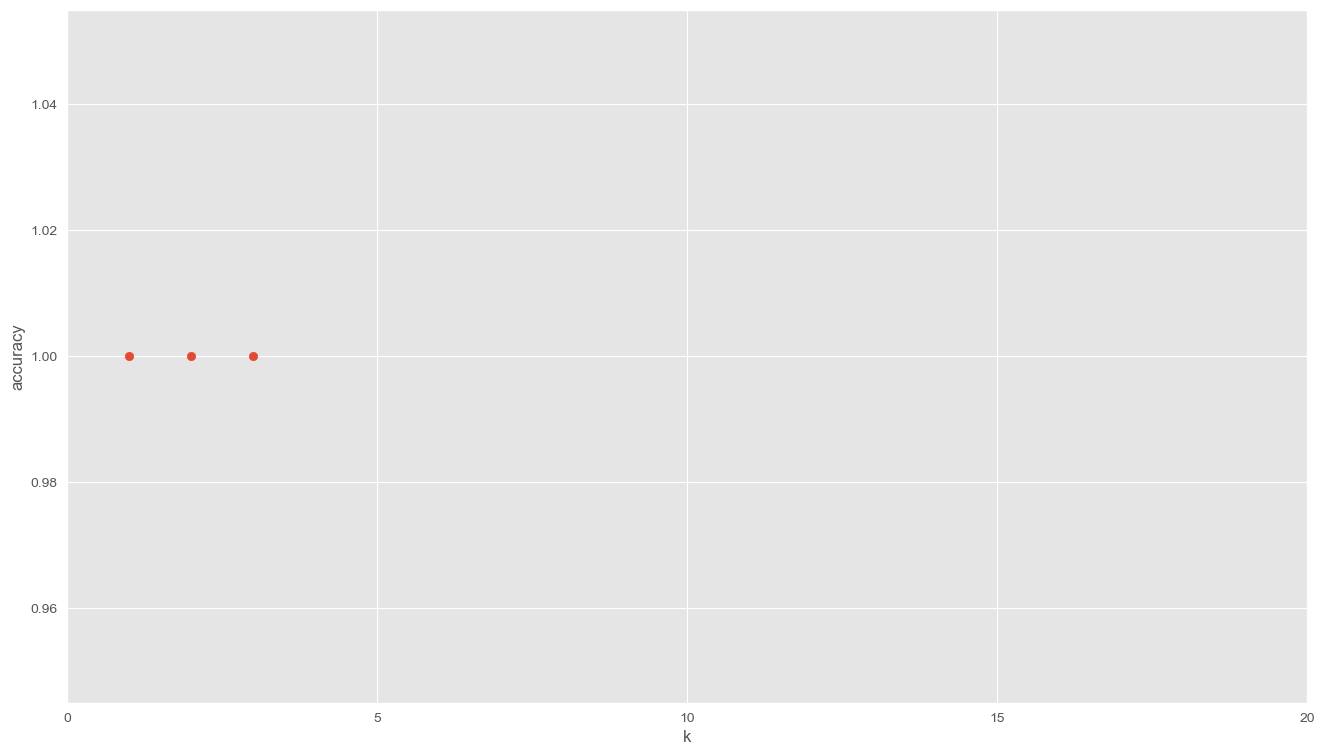

In [22]:
k_range = range(1, 4)
scores = []
for k in k_range:
      knn = KNeighborsClassifier(n_neighbors = k)
      knn.fit(X_train, y_train)
      scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

## 8. Cálculo de nuevas predicciones

In [23]:
print(clf.predict([[5, 3]]))

[1]


In [24]:
print(clf.predict_proba([[5, 5]]))

[[0.72184698 0.27815302]]


# Webgrafia

[Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
[Libro "Hands on Machine Learning with ScikitLearn, Keras y TensorFlow" de Aurelien Geron y su repositorio de ejemplos ](https://github.com/ageron/handson-ml)
[Aprende ML de Juan Ignacio Bagnato](https://www.aprendemachinelearning.com/clasificar-con-k-nearest-neighbor-ejemplo-en-python/)
[Curso de Tirtjakupto Sarkar](https://github.com/tirthajyoti/Machine-Learning-with-Python)
[DataCamp](https://www.datacamp.com/)


# Licencia

[Attributon-ShacerAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)

Puedes utilizar libremente este material, con las siguientes condiciones:

* Atribuir la autoría a este documento.
* Si lo utilizas y haces cambios, deberás liberarlo también bajo la misma licencia.